# **Read data from Google Cloud APIs:**

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2024-09-16 03:56:00--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  47.3MB/s    in 1.4s    

2024-09-16 03:56:01 (47.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.692.jpg', 'cat.701.jpg', 'cat.784.jpg', 'cat.79.jpg', 'cat.44.jpg', 'cat.448.jpg', 'cat.864.jpg', 'cat.211.jpg', 'cat.677.jpg', 'cat.295.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


# **Visualize the data**

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

# You will output image in 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating
pic_index = 0

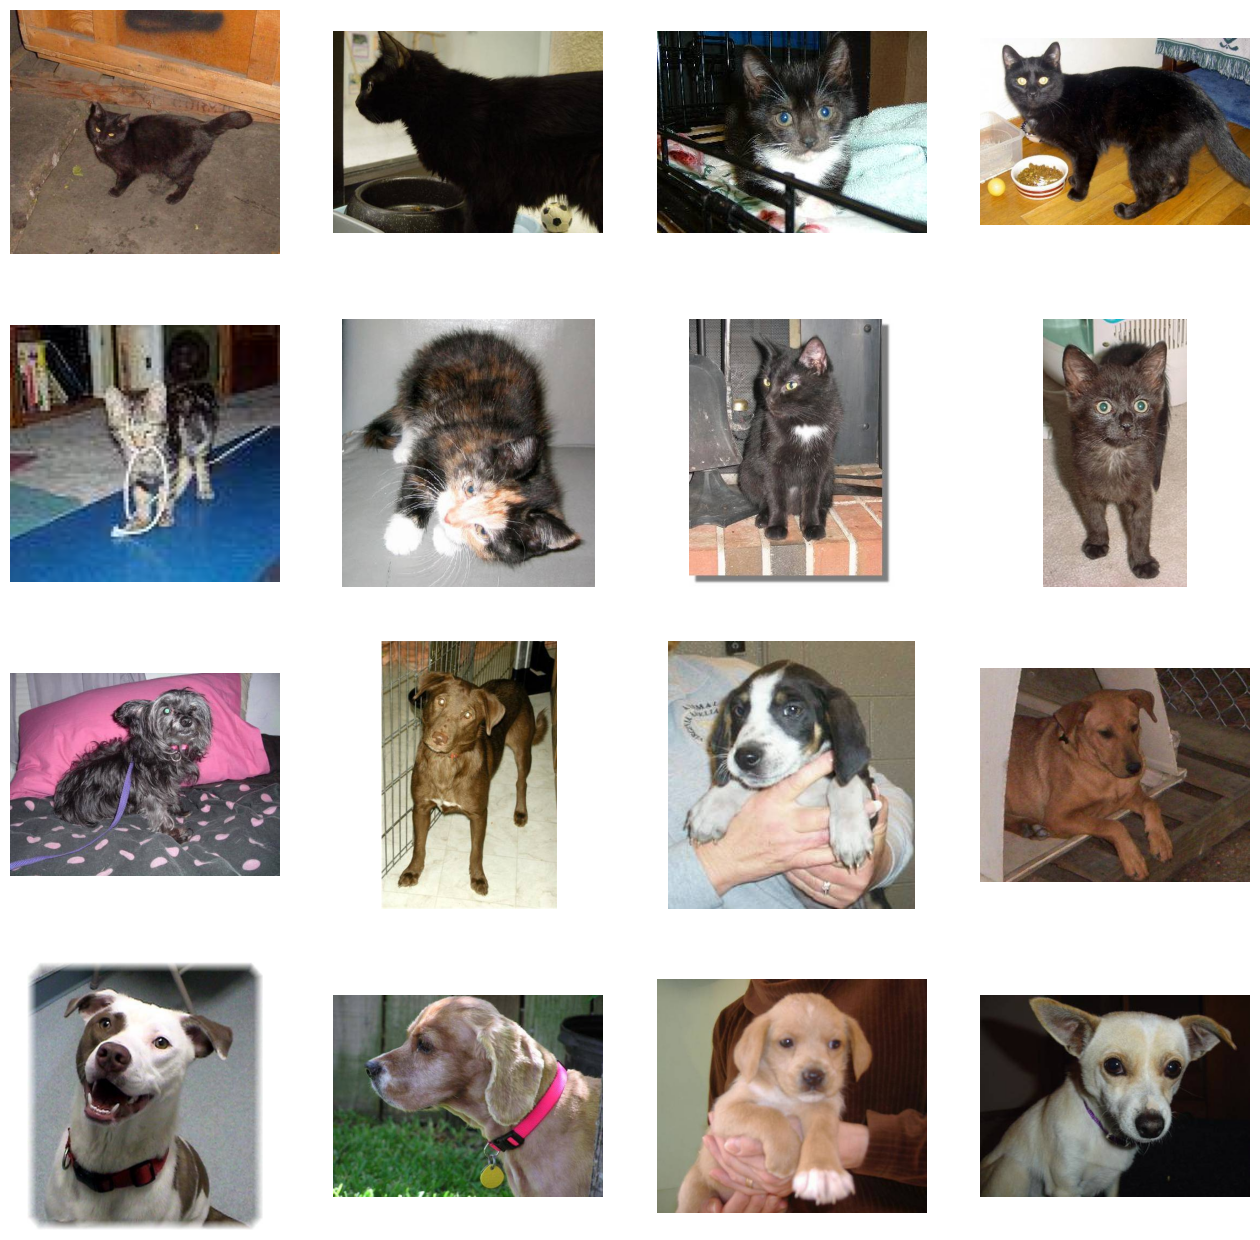

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)




## **First approach**


# Architecture of the CNN

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
img_input = layers.Input(shape=(150,150,3))

x = layers.Conv2D(16,(3,3),activation='relu' )(img_input)
x = layers.MaxPooling2D(2,2)(x)

x = layers.Conv2D(32,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(2,2)(x)

x = layers.Conv2D(64,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(2,2)(x)


x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1,activation='sigmoid')(x)


model=Model(img_input,output)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

## Data Preprocessing


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
)

validation_generator = test_gen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(

                    train_generator,
                    batch_size=20,
                    epochs=15,
                    validation_data=validation_generator,

                    verbose=2
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 14s - 142ms/step - acc: 0.5645 - loss: 0.6865 - val_acc: 0.6340 - val_loss: 0.6318
Epoch 2/15
100/100 - 5s - 53ms/step - acc: 0.6410 - loss: 0.6244 - val_acc: 0.6440 - val_loss: 0.6237
Epoch 3/15
100/100 - 4s - 43ms/step - acc: 0.7050 - loss: 0.5737 - val_acc: 0.6900 - val_loss: 0.5819
Epoch 4/15
100/100 - 6s - 64ms/step - acc: 0.7440 - loss: 0.5316 - val_acc: 0.7010 - val_loss: 0.5809
Epoch 5/15
100/100 - 6s - 60ms/step - acc: 0.7635 - loss: 0.4725 - val_acc: 0.7130 - val_loss: 0.5832
Epoch 6/15
100/100 - 11s - 108ms/step - acc: 0.8015 - loss: 0.4213 - val_acc: 0.7300 - val_loss: 0.5534
Epoch 7/15
100/100 - 10s - 97ms/step - acc: 0.8410 - loss: 0.3608 - val_acc: 0.7310 - val_loss: 0.5731
Epoch 8/15
100/100 - 4s - 44ms/step - acc: 0.8510 - loss: 0.3353 - val_acc: 0.7200 - val_loss: 0.6201
Epoch 9/15
100/100 - 4s - 44ms/step - acc: 0.8860 - loss: 0.2630 - val_acc: 0.7590 - val_loss: 0.6426
Epoch 10/15
100/100 - 6s - 61ms/step - acc: 0.9030 - loss: 0.2322 - val_acc: 0.7390 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


<ipython-input-14-3c74e9910012>:43: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-14-3c74e9910012>:46: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


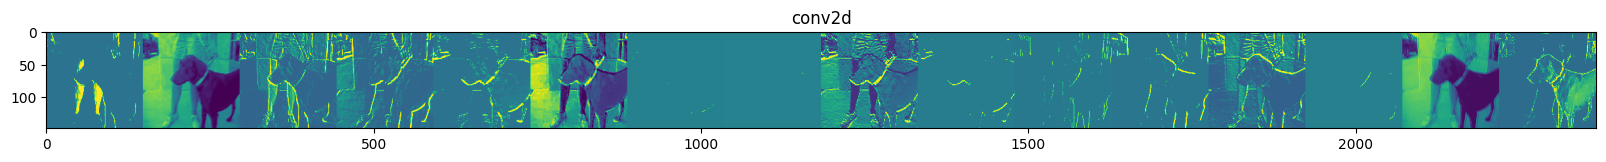

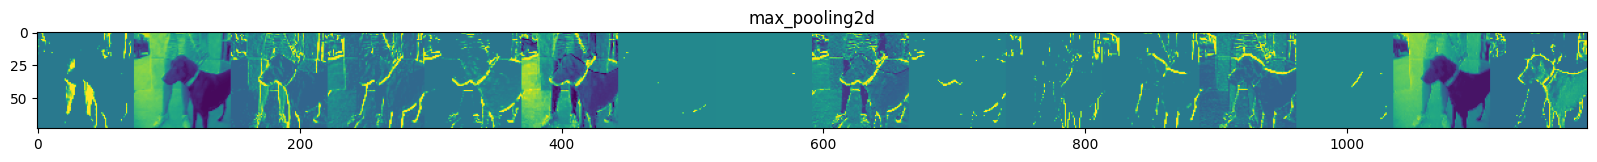

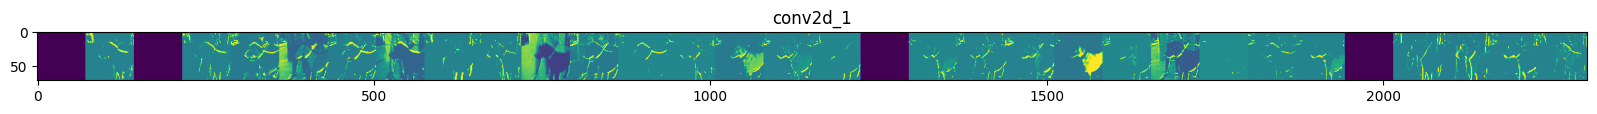

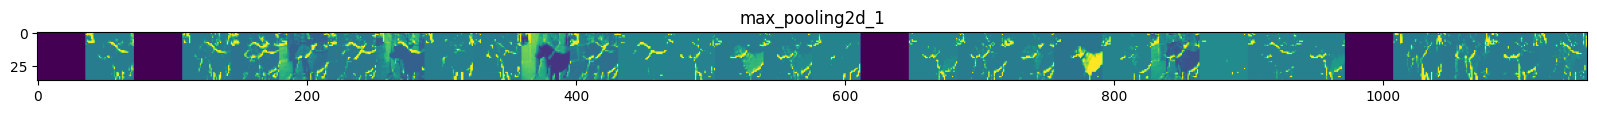

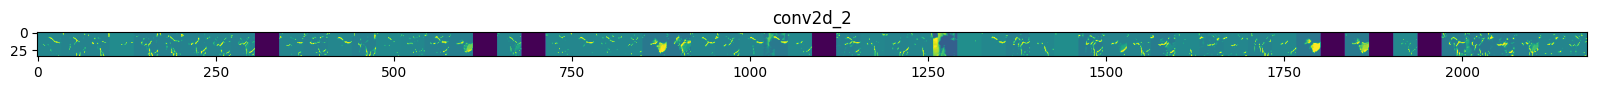

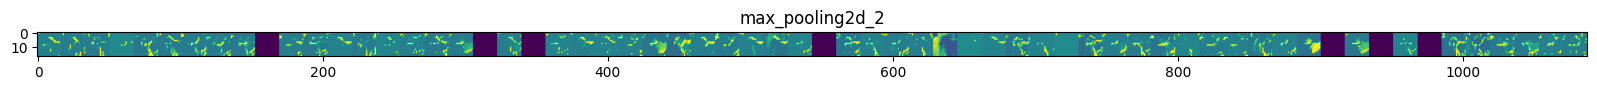

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

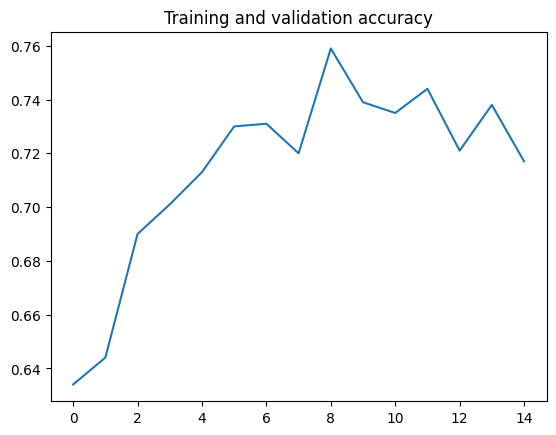

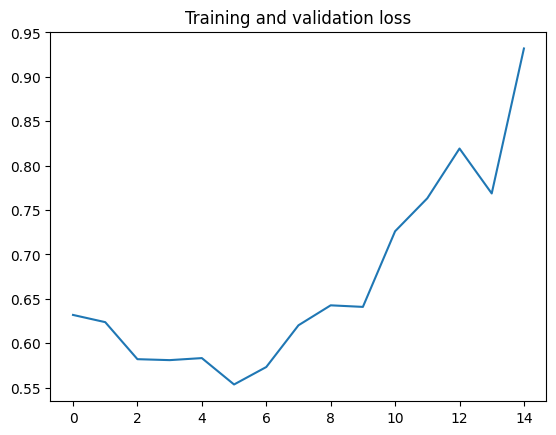

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['val_acc']
#val_acc = history.history['val']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['val_loss']
#val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
#plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
#plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

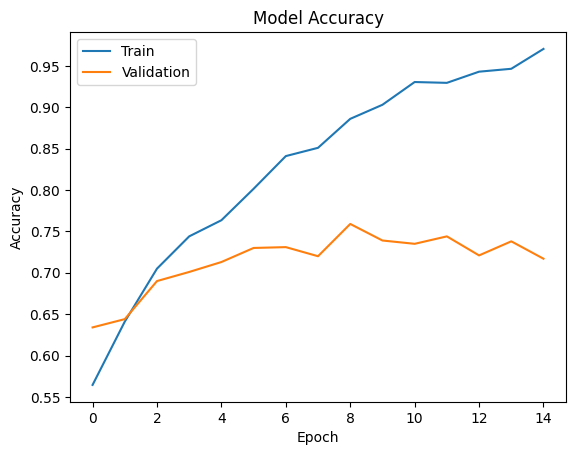

In [ ]:
# Access training and validation accuracy from history
train_acc = history.history['acc']
val_acc = history.history['val_acc']

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

---
---
---

# **Another approach**

In [18]:
import keras ,os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [32]:
# Use DataGenerator on "Training" data
trdata = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    channel_shift_range = 10,
    fill_mode = 'nearest'
)

train_batches = trdata.flow_from_directory(
    directory = train_dir,
    target_size = (224,224),
    classes = ['cats', 'dogs'],
    batch_size = 32
)


# Use only rescale on "Training" data
trdata = ImageDataGenerator(
    rescale = 1./255
)
valid_batches = trdata.flow_from_directory(
    directory = validation_dir,
    target_size = (224,224),
    classes = ['cats', 'dogs'],
    batch_size = 32
)




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## **Architecture of CNN**

In [26]:
model = Sequential()

model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding='same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding='same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 134,268,738 (512.19 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    "vgg16_1.keras",  # Filepath to save the model
    monitor='val_accuracy',  # Monitor validation accuracy
    verbose=1,  # Verbosity level, 1 to print logs
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the full model, not just weights
    mode='auto',  # Automatically choose the right mode (min or max)
    save_freq="epoch",  # Save model after every epoch
    # save_format='h5'
)

# Stop training early if validation accuracy doesn't improve
early = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    min_delta=0,  # Minimum change to qualify as an improvement
    patience=20,  # Number of epochs to wait for improvement
    verbose=1,  # Verbosity level
    mode='auto'  # Automatically choose the right mode (min or max)
)
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=50,  # Set a larger number of epochs
    callbacks=[checkpoint, early]  # Pass the callbacks here
)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.4862 - loss: 0.6932
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to vgg16_1.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4863 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.4828 - loss: 0.6932
Epoch 2: val_accuracy did not improve from 0.50000
63/63 ━━━━━━━━━━━━━━━━━━━━ 59s 734ms/step - accuracy: 0.4829 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.5191 - loss: 0.6931
Epoch 3: val_accuracy did not improve from 0.50000
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 673ms/step - accuracy: 0.5188 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.5067 - loss: 0.6931
Epoch 4: val_accuracy did not improve from 0.50000
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 662ms/step - accuracy: 0.5066 - loss: 

KeyboardInterrupt: 

**The Architecture is very bad because the size of the data is not enough to train the model well, so we're going to use Pretrained model**

---
---
---

## **Another approach using pretrained model**

In [33]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [34]:
def vgg16_pretrained(input_shape=(224,224,3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    image_input = Input(shape=(224,224,3))
    x = base_model(image_input)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(2, activation='softmax')(x)

    model = Model(inputs=image_input, outputs=x)
    return model

In [35]:
# Compile the model
model_pretrained = vgg16_pretrained()
model_pretrained.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_pretrained.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=50,
    callbacks=[checkpoint, early]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.5814 - loss: 10.2200
Epoch 1: val_accuracy improved from 0.50000 to 0.89200, saving model to vgg16_1.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5834 - loss: 10.1112 - val_accuracy: 0.8920 - val_loss: 0.2454
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.8421 - loss: 0.3433
Epoch 2: val_accuracy improved from 0.89200 to 0.92400, saving model to vgg16_1.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 955ms/step - accuracy: 0.8422 - loss: 0.3432 - val_accuracy: 0.9240 - val_loss: 0.2112
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.8714 - loss: 0.3114
Epoch 3: val_accuracy did not improve from 0.92400
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 498ms/step - accuracy: 0.8713 - loss: 0.3117 - val_accuracy: 0.8690 - val_loss: 0.2787
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.8493 - loss: 0.3385
Epoch 4: val_accuracy did not improve from 0.92400
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 484ms/ste

## **The pretrained model is way better than the from scratch one**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
cat


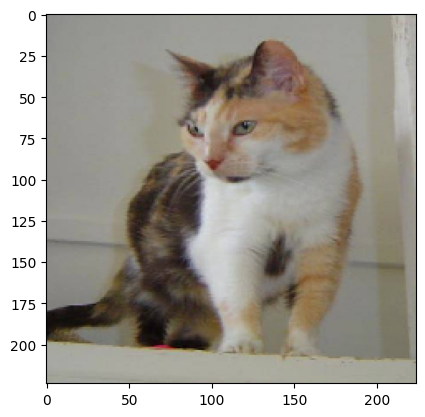

In [59]:
# You can change the picture and the directory as you want
rand= str(random.randint(0, 999))
fname_dog = 'dog.'+rand+'.jpg'
fname_cat = 'cat.'+rand+'.jpg'

pic_path_dog = os.path.join(train_dogs_dir, fname_dog)
pic_path_cat = os.path.join(train_cats_dir, fname_cat)

import random
var = random.choice([pic_path_dog, pic_path_cat])

import matplotlib.pyplot as plt
from keras.utils import load_img
img = load_img(var,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = model_pretrained.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

Text(0.5, 1.0, 'Training and validation loss')

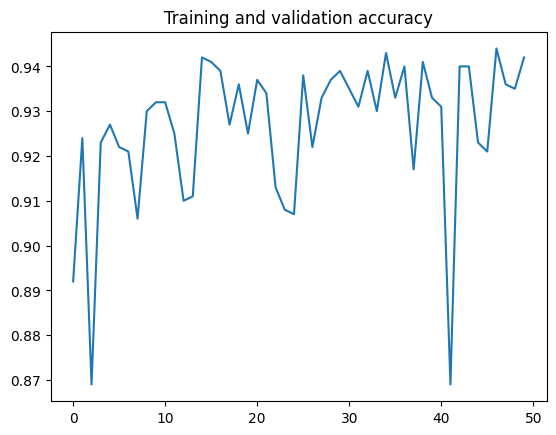

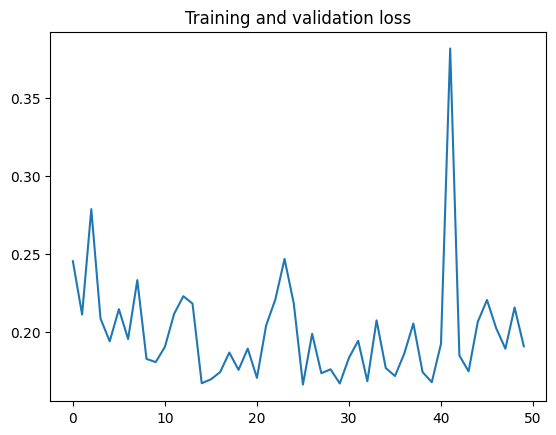

In [38]:
acc = history.history['val_accuracy']
#val_acc = history.history['val']

loss = history.history['val_loss']
#val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
#plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
#plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

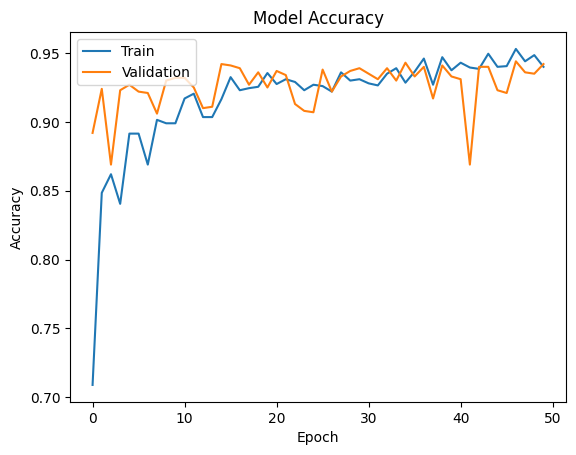

In [39]:
# Access training and validation accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

---
---
---

# **The END**